In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel(r"housing.xls")
data

,HOUSE,IR
0,1711,13.08
1,1632,12.92
2,1800,13.17
3,1821,13.20
4,1680,12.91
...,...,...
247,2075,5.82
248,2158,5.77
249,2046,6.07
250,2131,6.33


In [3]:
data.shape

(252, 2)

In [4]:
data.head()

,HOUSE,IR
0,1711,13.08
1,1632,12.92
2,1800,13.17
3,1821,13.20
4,1680,12.91


In [5]:
x = data["HOUSE"]
y = data["IR"]
print(x[0:5],y[0:5])

0    1711
1    1632
2    1800
3    1821
4    1680
Name: HOUSE, dtype: int64 0    13.08
1    12.92
2    13.17
3    13.20
4    12.91
Name: IR, dtype: float64


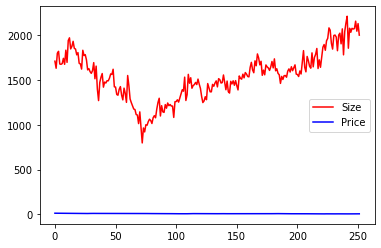

In [6]:
plt.plot(x,'red',label='Size')
plt.plot(y,'blue',label='Price')
plt.legend()
plt.show()

In [7]:
#Normalization
x=(x-np.mean(x))/(max(x)-min(x))
y=(y-np.mean(y))/(max(y)-min(y))
print(x[0:5],y[0:5])

0    0.114165
1    0.058335
2    0.177063
3    0.191904
4    0.092257
Name: HOUSE, dtype: float64 0    0.603000
1    0.582925
2    0.614293
3    0.618057
4    0.581670
Name: IR, dtype: float64


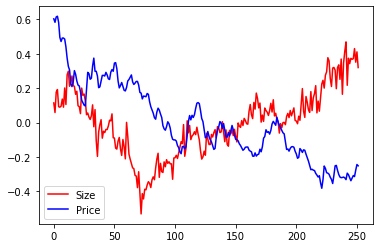

In [8]:
plt.plot(x,'red',label='Size')
plt.plot(y,'blue',label='Price')
plt.legend()
plt.show()

In [9]:
#data.value

In [10]:
x = x.values.reshape(len(x),1)

In [11]:
x.shape

(252, 1)

In [12]:
type(x)

numpy.ndarray

In [13]:
y.shape

(252,)

In [14]:
y = y.values.reshape(len(y),1)

In [15]:
y.shape

(252, 1)

In [16]:
type(y)

numpy.ndarray

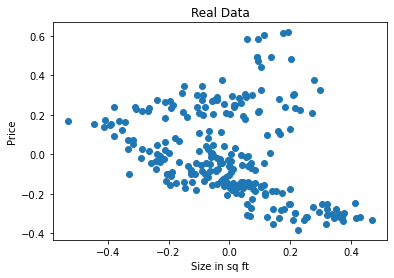

In [17]:
plt.scatter(x,y)
plt.xlabel('Size in sq ft')
plt.ylabel('Price')
plt.title('Real Data')
plt.savefig('Test.png')


# Linear Regression

In [18]:
def h(x,theta,b): #hypothesis function
    return (x@theta)+b

In [19]:
def cost_function(x,y,theta,b): #Cost Function
    return ((h(x,theta,b)-y).T@(h(x,theta,b)-y))/(2*y.shape[0])

In [20]:
def gradient_desent(x,y,theta,b,l_r,epochs):
    m=x.shape[0]
    j_all = []
    
    for i in range(epochs):
        h_of_x = h(x,theta,b)
        cost1d = (1/m)*(x.T@(h_of_x - y)) 
        cost0d = (1/m)*((h_of_x - y))
        theta = theta - (l_r)*cost1d
        b = b - (l_r*cost0d)
        j_all.append(cost_function(x,y,theta,b))
        
    return theta,b,j_all

In [21]:
theta = np.zeros((x.shape[1],1))
b=0


# manually change

l_r = 0.05
epochs = 5000


theta,b,j_all=gradient_desent(x,y,theta,b,l_r,epochs)

cost_fn = cost_function(x,y,theta,b)

print(cost_fn)
print(theta)
print(b)

[[0.00308413]]
[[-0.3574394]]
[[ 4.03455941e-01]
 [ 3.79071351e-01]
 [ 4.23801765e-01]
 [ 4.29294380e-01]
 [ 3.85422742e-01]
 [ 3.30352665e-01]
 [ 3.16542449e-01]
 [ 3.37951671e-01]
 [ 3.27984187e-01]
 [ 3.47542133e-01]
 [ 2.98887887e-01]
 [ 2.94133755e-01]
 [ 2.68596081e-01]
 [ 2.36727420e-01]
 [ 1.91154889e-01]
 [ 1.88581790e-01]
 [ 1.92618941e-01]
 [ 2.34210173e-01]
 [ 2.11118848e-01]
 [ 1.90363782e-01]
 [ 1.57511209e-01]
 [ 1.53460627e-01]
 [ 1.23515753e-01]
 [ 1.23966902e-01]
 [ 1.06505144e-01]
 [ 9.85189149e-02]
 [ 8.67323755e-02]
 [ 1.32440244e-01]
 [ 1.95313948e-01]
 [ 1.85518865e-01]
 [ 1.62165452e-01]
 [ 1.70575968e-01]
 [ 2.28176723e-01]
 [ 2.30609641e-01]
 [ 2.03426927e-01]
 [ 1.65342213e-01]
 [ 1.28782245e-01]
 [ 1.16200854e-01]
 [ 1.28136162e-01]
 [ 1.55551973e-01]
 [ 1.53465986e-01]
 [ 1.61945786e-01]
 [ 1.57940855e-01]
 [ 1.75230211e-01]
 [ 1.65607529e-01]
 [ 1.55859711e-01]
 [ 1.60483349e-01]
 [ 1.86433493e-01]
 [ 2.04535975e-01]
 [ 1.69061423e-01]
 [ 1.98615844e-01]
 

In [22]:
#Predicted Values
print(h(x,theta,b))

[[ 3.62648827e-01]
 [ 3.58220218e-01]
 [ 3.60512597e-01]
 [ 3.60700458e-01]
 [ 3.52446456e-01]
 [ 2.98386809e-01]
 [ 2.82555734e-01]
 [ 2.89061122e-01]
 [ 2.96018330e-01]
 [ 2.75664315e-01]
 [ 2.61364669e-01]
 [ 1.94974343e-01]
 [ 1.61858449e-01]
 [ 1.61313099e-01]
 [ 1.08667563e-01]
 [ 9.16958442e-02]
 [ 1.15688976e-01]
 [ 1.59048460e-01]
 [ 1.52376613e-01]
 [ 1.25306363e-01]
 [ 1.22766672e-01]
 [ 1.20231734e-01]
 [ 1.04938087e-01]
 [ 5.23416912e-02]
 [ 4.97837675e-02]
 [ 3.92714646e-02]
 [ 4.21361516e-02]
 [ 1.16136043e-01]
 [ 1.75473244e-01]
 [ 1.74266811e-01]
 [ 1.55712938e-01]
 [ 1.56545234e-01]
 [ 1.91411327e-01]
 [ 2.39313568e-01]
 [ 1.76513218e-01]
 [ 2.03095985e-01]
 [ 1.99122366e-01]
 [ 1.35514290e-01]
 [ 1.32545764e-01]
 [ 1.49604673e-01]
 [ 1.85915004e-01]
 [ 1.79996185e-01]
 [ 1.78769935e-01]
 [ 1.89491500e-01]
 [ 1.80121425e-01]
 [ 1.62795387e-01]
 [ 1.55546479e-01]
 [ 1.83012267e-01]
 [ 1.86463523e-01]
 [ 2.00500012e-01]
 [ 2.30812255e-01]
 [ 2.41009872e-01]
 [ 2.1973478

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,h(x,theta,b))

0.06313809929532735

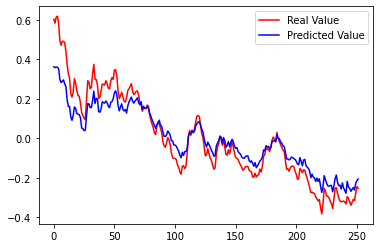

In [26]:
plt.plot(y,'red',label='Real Value')
plt.plot(h(x,theta,b),'blue',label='Predicted Value')
plt.legend()
plt.show()